<a href="https://colab.research.google.com/github/Simmonslin/PyStatistics/blob/master/%E8%B3%87%E6%96%99%E6%8E%A2%E5%8B%98_10_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Data preprocessing is an important issue for data mining. What are the tasks in  data preprocessing?



## Answer : 資料預處理是資料探勘的首要步驟，用意在於確保數據的品質以及一致性，並清除資料中的不確定元素以及雜質，讓數據更適合用於後續的分析以及訓練。

<hr>

### 資料預處理包含下列步驟:

### 1. 資料清理：處理缺失值、重複數據和異常值，確保數據的完整性和準確性

### 2. 資料整合：將來自不同來源的數據合併，消除不一致性

### 3. 資料轉換：將數據轉換為適合分析的格式，例如標準化、縮放和特徵提取

### 4. 資料縮減: 透過微分方式將數據進行降維，提升訓練及模型預測的效率


## 2. Please use “Equal Width” and “Equal Depth” Binning Method to smooth the  Dataset {17,42,3,29,12,21,6,29,22} into 3 boxes. Then, please use “Means”,” Median”, and “Boundaries” methods to eliminate the noisy data in final results,  respectively.


#1. Equal Width 方法

[ 3.          7.33333333 11.66666667 16.         20.33333333 24.66666667
 29.         33.33333333 37.66666667 42.        ]
分類答案: [array([3., 6.]), array([12.]), array([17.]), array([21., 22.]), array([29.]), array([42.])]


Text(0, 0.5, 'Data')

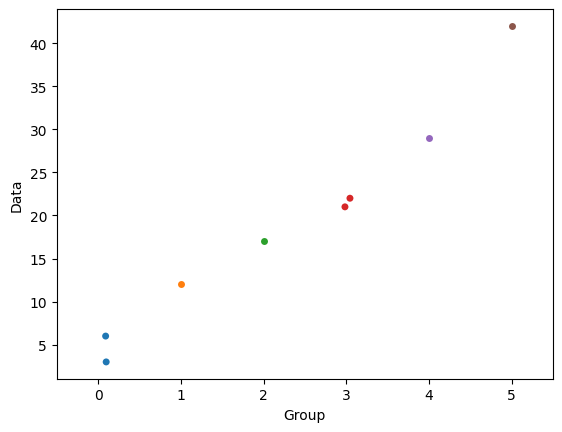

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 將Data由小到大排序
data=np.array([17,42,3,29,12,21,6,29,22])
data=np.sort(data)

# Equal width method
min_data=data.min()
max_data=data.max()
interval_num=(max_data-min_data)/len(data)

interval=np.zeros(len(data)+1)

# 設定每個區間的臨界值
for i in range(len(data)):
  if min_data+i*interval_num<=max_data:
    interval[i]=min_data+i*interval_num

interval[len(data)]=max_data
print(interval)


# 設function 進行Data的分類
# setdiffid = 刪除為0的array

def equal_depth(number):
  box=np.zeros(len(data))
  for i in data :
    if i>=interval[number-1] and i<=interval[number]:
      box=np.append(box,i)
      box=np.setdiff1d(box,0)
  return box


# 將function帶入
ans=[equal_depth(i+1) for i in range(len(data))]

# any() = 全部為0時顯示False ，否則為True，並排除值為0的Array
ans=[array for array in ans if any(array)]
del ans[4]


print("分類答案:",ans)
sns.stripplot(ans)
plt.xlabel("Group")
plt.ylabel("Data")





分類答案: [array([ 3,  6, 12]), array([17, 21, 22]), array([29, 29, 42])]


Text(0, 0.5, 'Data')

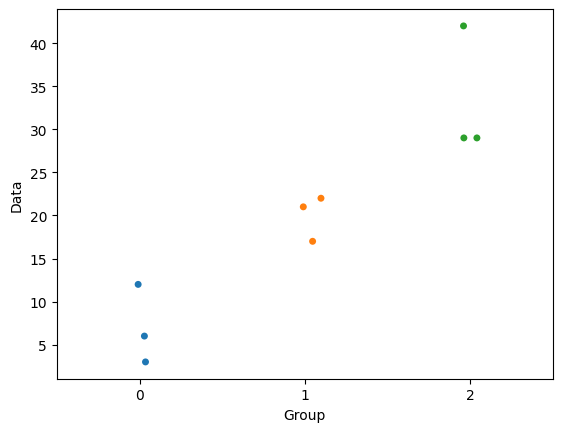

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=np.array([17,42,3,29,12,21,6,29,22])
data=np.sort(data)

def equal_width(number,number_2):
  box=data[number-1:number_2]
  return box

ans_width=[equal_width(3*i-2,3*i) for i in range(1,4)]

print("分類答案:",ans_width)
sns.stripplot(ans_width)
plt.xlabel("Group")
plt.ylabel("Data")



# 作業2 : 5 Scikit learn 2 資料預處理練習

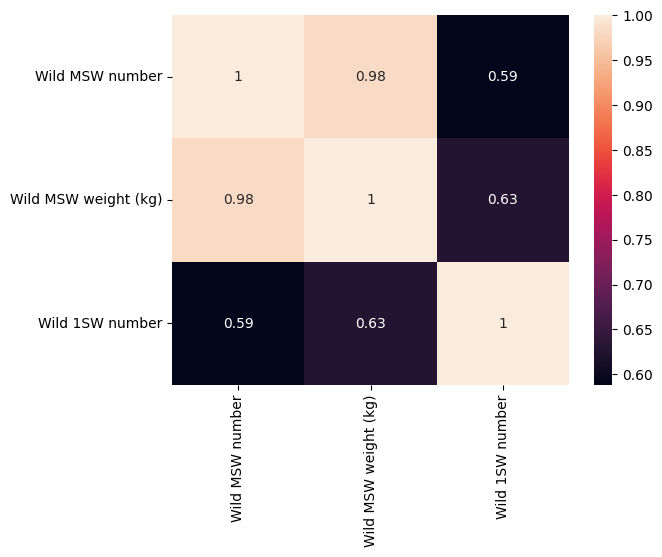

In [23]:
import pandas as pd
# 處理類別型資料,將類別屬性編碼
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

salmon=pd.read_csv("/SalmonandSeaTroutNets1952-2022.csv")
salmon.isnull().sum()
salmon.dropna(inplace=True)
salmon.isnull().sum()

le=LabelEncoder()
# 以District為例

salmon["District"]=le.fit_transform(salmon["District"])

# 計算個別District總數
salmon["District"].unique()


# 計算相關係數並做成熱力圖，[[]] ==> 多columns取樣
salmon_corr=pd.DataFrame(salmon[["Wild MSW number","Wild MSW weight (kg)","Wild 1SW number"]])
salmon_corrMatrix=salmon_corr.corr()
sns.heatmap(salmon_corrMatrix,annot=True)
plt.show()









In [24]:
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving 資料探勘_10_7 (1).ipynb to 資料探勘_10_7 (1).ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>